# PHY 3310 - Quantum Mechanics
# Introduction to spin physics with Qiskit
-----------------------------------------------------------

## "Hello world"

In this tutorial, we are going to explore the basics of using IBM's quantum devices. There are essentially <i>three</i> ways you can use this hardware:

1. Use the IBM Quantum Composer to drag and drop gates in order to create quantum circuits
2. Use the IBM Quantum Lab (like Google colab) to run Jupyter notebooks on the cloud
3. Download and install Qiskit on your own machine and run Jupyter notebooks locally

In this course, you'll want to choose either option 2 or 3. Running things in the IBM Quantum Lab is fine for most applications. But the extra effort required to install Qiskit really pays off with additional flexibility. 

You can download Qiskit from the main Qiskit [website](https://qiskit.org/). This website also contains detailed installation information. Note that it is recommended to create a separate ```conda``` environment. You might also find that other packages need to be reinstalled in this environment. 

To (a) run circuits on the actual quantum hardware and (b) gain access to IBM Quantum Composer/Lab environments, you'll need to create a free IBM Quantum [account](https://www.ibm.com/quantum-computing/).

In what follows, I will assume you have an IBM Quantum account and are working on a local installation of Qiskit.

Aside from importing ```qiskit```, all we need to get started is the ``standard'' stuff:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
#%matplotlib inline

A classical bit can take on the values of 0 or 1. A small piece of magnetic material can physically represent this bit. Specifically, taking the $z$ axis as our preferred direction, a magnetization pointing "up" can represent 0 while "down" can represent 1. External magnetic fields can be used to flip these domains invidually, allowing arbitrary binary information to be encoded in some large collection of bits.

In a <i>quantum</i> computer, these bits are replaced by <b>qubits</b>, or two-level quantum mechanical systems which can exist in an arbitrary superposition of two basis states (labeled $\left|0\right\rangle$ and $\left|1\right\rangle$).

$$\left|\psi\right\rangle = \alpha \left|0\right\rangle + \beta \left|1\right\rangle$$

A measurement of the state then results in the system "collapsing" to either $\left|0\right\rangle$ or $\left|1\right\rangle$. The quantum "weirdness" results from the fact that before such a measurement, the system really doesn't have a well-defined "value" (0 or 1). 

The states $\left|0\right\rangle$ and $\left|1\right\rangle$ can be mapped to the spin basis states $\left|+\right\rangle$ and $\left|-\right\rangle$ where

$$\hat{S}^{z} \left|\pm\right\rangle = \pm \frac{\hbar}{2}\left|\pm\right\rangle$$

<b>Important warning:</b> In the Qiskit documentation, the labels $\left|\pm\right\rangle$ actually refer to the linear combinations $\left|\pm\right\rangle \rightarrow \frac{1}{\sqrt{2}}\left(\left|0\right\rangle \pm \left|1\right\rangle\right)$ rather than the eigenstates of $\hat{S}^{z}$ as in McIntyre's [textbook](https://sites.science.oregonstate.edu/physics/coursewikis/portfolioswiki/texts_quantumbook_start.html). In an effort to make these material congruent with the textbook's notation, I will follow McIntyre's conventions. Just be warned that you might see some seemingly-strange conventions if you go poking around the (excellent) Qiskit [textbook](https://qiskit.org/textbook/).

Let's consider an extremely circuit to see how some of this stuff works. The following commands create a single-qubit circuit (so it's like simulating a single spin):

In [35]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

circ = QuantumCircuit(qr,cr)

The ```QuantumRegister(n)``` creates a circuit with ```n``` qubits. From this point on, you can mentally replace "qubit" by "spin." Note that upon measuring a qubit (just like when measuring a spin), the system takes a definite state. The ```ClassicalRegister(n)``` is used to record the state of the system. If ```n``` qubits are used, we will need ```n``` slots in the classical register to record the states for each qubit in the system.

<b>Important note:</b> By default, each qubit is initialized to the state $\left|0\right\rangle$. That means, we can pretend our quantum circuit represents a collection of spin-$\frac{1}{2}$ degrees of freedom initialized in $\left|+\right\rangle$.

Once we have the circuit structure, we can start to add things to it. For simplicity, let's just measure the state of the system. That's about the one thing right now for which we can probably guess the final answer. The first line below measures the state of each qubit (here just one) and records that information in the classical register. The line below that will draw a visual depiction of our humble circuit.



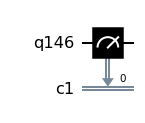

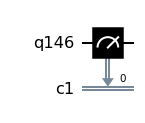

In [36]:
circ.measure(qr,cr)
circ.draw(output = 'mpl')

A more basic schematic can be created as follows:

In [37]:
circ.draw()

┌─┐
q146_0: ┤M├
        └╥┘
  c1: 1/═╩═
         0

The best practice is to run any circuit on a <i>simulator</i> before using actual quantum hardware. There are only a few machines and many people trying to access them. You might end up waiting a while to do a computation, so you want to make sure it behaves as expected whenever possible. Here's how to run this circuit:

In [38]:
job = execute(circ,backend=BasicAer.get_backend('qasm_simulator'))
counts = job.result().get_counts()

So what did we get? By default, "executing" a circuit will actually run the circuit 1024 times--remember, we need to perform <i>many</i> identical experiments to rebuild information about the state of the system. Only expectation values are deterministic. The object ```counts``` stores the results of these 1024 runs (or "shots") by listing all of the states measured and the number of times each state was obtained. For a single qubit, we only get "0" or "1" as possibilities.

In [39]:
counts

{'0': 1024}

So all 1024 times, the system was observed in the state $\left|0\right\rangle$. This is not surprising, because all we did was to create a bunch of these $\left|0\right\rangle$ states and then measure them. Now let's see what happens on a <i>real</i> quantum machine.

To access the quantum hardware, you'll need to load your IBM Quantum account. If you log in using a web browser, you can copy the API token and paste it into the slot below. Once you save the account <i>once</i> on a given machine, you shouldn't need to run that command ever again. ```IBMQ.load_account()``` will be all you need for future endeavors.

In [2]:
#IBMQ.save_account('5dc2980e216e5d4f18994d5ef6d82a504c28071b44eaa656b6ba3c366bbbaf964eba52c233079ef0575dc42869a642c6c1efa4d7c1f040c836d636cfc42b853a')
#comment out the above line after executing it once

IBMQ.load_account() #uncomment and use this for any future notebooks

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Your default "provider" is the IBM-Q open group--that is the stuff that's available to everyone in the world. Once I have added you to the course project, you can load the special set of hardware. If you have not been added, use the commented line below instead.

In [3]:
provider = IBMQ.get_provider(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')

#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main') use this line instead if not added to PHY 3310 project

#for research, use the following
#provider = IBMQ.get_provider(hub='ibm-q-research-2', group='high-point-uni-1', project='main')

Once you're in, you need to select a machine to use. Generally, it's advisable to use the smallest machine possible. Note that you have access to machines (or "backends") with 1, 5, or 7 qubits. The "quantum volume" (QV) is a rough measure of how complex your circuit can be before noise and errors accumulate excessively. Using more qubits or adding more gates (increasing the "depth" of the circuit) increase the required quantum volume. We'll come back to what gates are soon.

If you log into your IBM Quantum account, you should find a list of all available backends. Clicking on one, you can see (a) how many qubits it contains, (b) how many jobs are currently in the queue and (c) the estimated QV of that backend. Alternatively, you can get a list of available backends on the command line:


In [9]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project=

For our purposes, it's probably easiest to just scan through the available backends on the website and select the smallest possible queue. Once you find one, you can set this as your quantum backend as shown below. Note that you're always free to change this machine.

<b>Important note: </b> For our present purposes, a good balance is to restrict attention to the five-qubit machines. You might find that the one-qubit device, ```ibmq_armonk```, is quite noisy for what we're doing. 

In [10]:
qcomp = provider.get_backend('ibmq_belem')

If you ever want to cut straight to the least-busy machine, you can also use 

```
qcomp = provider.get_backend(providers.ibmq.least_busy(provider.backends()))
```

Once you have a backend, you can run the circuit pretty much just as before. The ```job_monitor``` is just a convenient feature that lets you keep up with your job as it filters through the queue. 

<b>Important remark:</b> IBM uses <i>dynamic</i>, "fair share" queuing to balance loads. This means that you might get bumped or boosted in a seemingly random manner. It's still a good idea to use the machines with the smallest queues.

In [11]:
job = execute(circ,backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

counts = job.result().get_counts()

Job Status: job has successfully run


Once the job has run, take a look at the results. You can import the ```plot_histogram()``` function to visualize this:

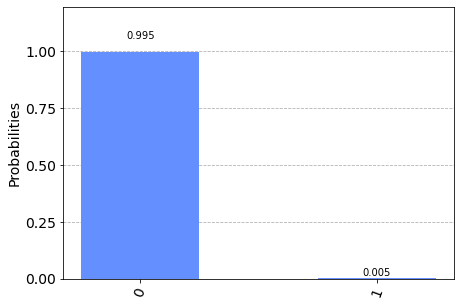

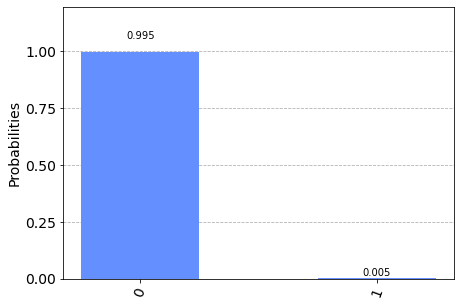

In [14]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [16]:
counts

{'0': 1019, '1': 5}

A-ha! So despite preparing a bunch of spins in the "up" state, we find that a few are being measured in the "down" state. These quantum machines are cooled to $\sim 15$ mK and isolated from their environment. But errors still creep into even circuits as simple as ours. It works <i>pretty</i> well, but it isn't perfect. You can try different backends with a simple circuit like this to get a sense for what that quantum volume measure means in terms of results. In general, the larger the circuit, the more error you will find.

But take a moment to congratulate yourself. You just ran a job on an actual quantum computer. The good news is that the process does not get much more complicated than this. So let's try to do something a little more interesting.


## Measuring other observables

Perhaps we would like to measure $\hat{S}^{x}$ instead of $\hat{S}^{z}$. Take a moment to ask yourself what kind of result you <i>expect</i> in this case.

As a practical matter, it should be noted that the only "measurement" we can make is actually the operator $\hat{S}^{z}$. In order to get around this, we can apply a trick: we simply rotate the system so that the new $z$ axis is aligned with the orignal $x$ axis. By measuring $\hat{S}^{z}$ in this rotated state, we're effectively measuring $\hat{S}^{x}$ on the original state. Sneaky, huh?

But <i>how</i> do we "rotate" the system? To actually do anything interesting to these qubits, we apply <b>quantum gates</b> which change the state of the system. You can think of these gates as unitary operators. For example, there is a gate $X$ which corresponds to the operator $\hat{S}^{x}$ with the same ($Y$ and $Z$) for $\hat{S}^{y}$ and $\hat{S}^{z}$. I will introduce various gates as we need them, but you can read all about them in the Qiskit [textbook](https://qiskit.org/textbook/ch-states/single-qubit-gates.html).

Quite conveniently for us, there are rotation gates, $R_{x}(\theta)$, $R_{y}(\theta)$, and $R_{z}(\theta)$, which rotate the system about $x$, $y$, or $z$ by an angle $\theta$. 

Now, conceptually, what we want to do is the following: imagine rotating the coordinate system by -90 degrees about the positive $y$ axis as shown below. If a spin were aligned perfectly along in the $+x$ direction, such a rotation would bring this spin into alignment with the $z$ axis. Performing a measurement, one would conclude the <i>rotated</i> system was in the state $\left|0\right\rangle$ (or, "spin up"). So measuring the so-called computational basis (or, $\hat{S}^{z}$) after a rotation is equivalent to measuring $\hat{S}^{x}$ in the original system.

The whole trick for measuring spin along <i>any</i> direction is to first rotate the system. If we wish to measure spin along some unit vector $\hat{n}(\theta,\phi)$, we can rotate the system by an amount $-\phi$ about the $z$ axis and then $-\theta$ about the $y$ axis. Such a series of operations will bring $\hat{n}(\theta,\phi)$ into alignment with the $z$ axis.


![axes](images/nhat.png)

All that remains is to simply add some rotation gates. To measure spin along the $x$ axis ($\theta = \frac{\pi}{2}$, $\phi = 0$) we simply need to rotate the system by $-\frac{\pi}{2}$ about the $y$ axis to map spin up/down (in this direction) to the computational basis (eigenstates of $\hat{S}^{z}$). The rotation gates can be accessed as ```rx(angle,qbit)```, ```rx(angle,qbit)```, ```rx(angle,qbit)```, where ```angle``` is the desired rotation angle and ```qubit``` specifies which qubit to rotate.



In [1]:
circ2 = QuantumCircuit(qr,cr)
circ2.ry(-np.pi/2,0)
circ2.measure(qr,cr)
circ2.draw('mpl')

NameError: name 'QuantumCircuit' is not defined

So this circuit should simulate measuring $\hat{S}^{z}$ on the state $\left|+\right\rangle$. As you know, you cannot calculate what a given measurement should return. But you can calculate <i>expectation values</i>. This term is terribly misleading because we know that any individual measurement should return an eigenvalue of the operator being measured. The expectation value is simply the <i>expected</i> average of a large number of measurements repeated on identically prepared systems. What do you expect for $\left\langle \hat{S}^{x}\right\rangle$?

Let's see what the quantum computer gives!

<b>Important note: </b> You might also wish to adjust your backend at this point if the queues have changed significantly. Just copy ```qcomp = provider.get_backend('ibmq_provider')``` and paste it at the top of the cell below if so, changing ```ibmq_provider``` to the appropriate backend name.

In [18]:
job_sim = execute(circ2,backend=BasicAer.get_backend('qasm_simulator'))
counts_sim = job_sim.result().get_counts()

qcomp = provider.get_backend('ibmq_quito')
job_qc = execute(circ2,backend=qcomp)

job_monitor(job_qc)

counts_qc = job_qc.result().get_counts()

Job Status: job has successfully run


In [19]:
counts_sim

{'0': 504, '1': 520}

In [20]:
counts_qc

{'0': 552, '1': 472}

Even the simulator results will differ slightly from case to case due to statistical fluctuations, but you should see roughly 50/50 split between the state being $\left|0\right\rangle$ and $\left|1\right\rangle$. Recall that we <i>rotated</i> the system before the measurement, so we now interpret $\left|0\right\rangle\rightarrow \left|+\right\rangle_{x}$ and $\left|1\right\rangle \rightarrow \left|-\right\rangle_{x}$ (instead of $\left|+\right\rangle$ and $\left|-\right\rangle$, respectively. This 50/50 split is consistent with $\left\langle \hat{S}^{x}\right\rangle = 0$, as one would expect for $\left|\psi\right\rangle = \left|+\right\rangle$.

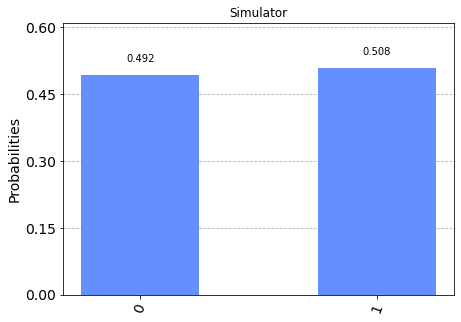

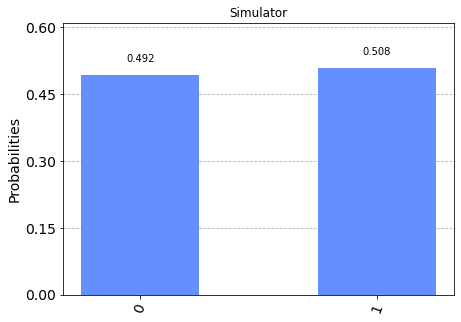

In [23]:
plot_histogram(counts_sim, title="Simulator")

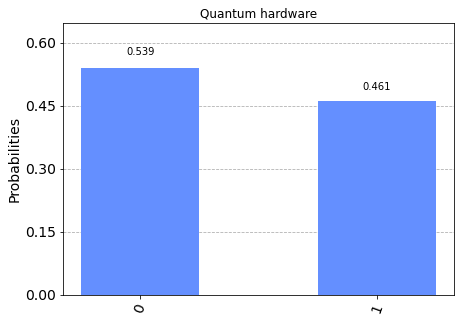

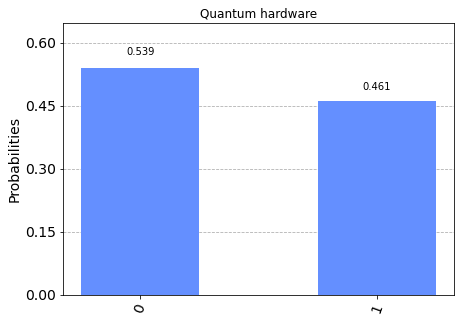

In [25]:
plot_histogram(counts_qc, title="Quantum hardware")

## Generating arbitrary states

So far, we have seen how to perform basic measurements of spin about any arbitrary direction. But we always begin with the same initial state, $\left|0\right\rangle \rightarrow \left|+\right\rangle$. Is it possible to generate other states?

Absolutely. I will note that we <i>could</i> just be really clever and show how what we have developed can be used directly to measure any component of spin for any initial state. We don't actually need to generate a state and rotate the desired measurement direction into the computational basis. But sometimes one operation is more convenient than the other. And for the case of <i>multiple</i> qubits, it's convenient to think of state initialization and measurement rotations as two separate processes. 

So let's begin!

Mathematically, how does one generate the state $\alpha\left|+\right\rangle + \beta \left|-\right\rangle$ from the state $\left|+\right\rangle$? This is equivalent to generating a vector by the following operation

$$\left(\begin{array}{c} \alpha\\ \beta \end{array}\right) = \hat{U}\left(\begin{array}{c}1\\ 0\end{array}\right).$$

The question becomes: what is $\hat{U}$ and how can I represent $\hat{U}$ as a quantum gate? We have already encountered the rotation gates, but there are much more general gates we can employ. First, let us note that $\alpha$ and $\beta$ are rather restricted. To ensure the state is normalized, we have $\left|\alpha\right|^{2} + \left|\beta\right|^{2} = 1$. Additionally, the overall phase of a state is physically unobservable.  That is, $e^{i\delta}\left|\psi\right\rangle$ is physically indistinguishable from $\left|\psi\right\rangle$. Putting these conditions together, we could parameterize the two complex numbers $\alpha$ and $\beta$ as two real numbers, $\theta$ and $\phi$,

$$\left(\begin{array}{c} \alpha\\ \beta \end{array}\right) \equiv \left(\begin{array}{c} \cos\frac{\theta}{2}\\ e^{i\phi}\sin\frac{\theta}{2} \end{array}\right)$$

As it happens, the most general single-qubit gate corresponds to the following operator:

$$\hat{U}(\theta,\phi,\lambda) \;\;\dot{=} \left(\begin{array}{cc} \cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2} \\ e^{i\phi}\sin\frac{\theta}{2} & e^{-i(\lambda + \phi)}\cos\frac{\theta}{2}\end{array}\right)$$

Here I use the symbol $\dot{=}$ to make a distinction between the physical gate used in a real quantum computer to change the physical state of the system and the mathematical represenation of states as vectors and operators as matrices. You should verify that $\hat{U}\left|+\right\rangle$ <i>does</i> return the state $\cos\frac{\theta}{2}\left|+\right\rangle + e^{i\phi}\sin\frac{\theta}{2}\left|-\right\rangle$. 

The proper syntax for adding a $U$ gate to act on qubit ```q``` some circuit ```mycirc``` is ```mycirc.u(theta,phi,lambda,q)```. 

<b>Exercise: </b> Use what you know to generate the state $\left|+\right\rangle_{y} = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle + i\left|-\right\rangle\right)$ and measure $\hat{S}^{x}$, $\hat{S}^{y}$, and $\hat{S}^{z}$. Note that based on what we've talked about, you'll need to design three separate circuits. Make sure to get simulator data and actual results. Before doing <i>any</i> programming, work out the values of $\theta$ and $\phi$ that you need (you can set $\lambda = 0$).

Also note: to measure $\hat{S}^{y}$, you'll have to perform <i>two</i> rotations before performing the measurement in the computational basis.

<b>Solution:</b>

In [13]:
circsx = QuantumCircuit(qr,cr)
circsx.u(np.pi/2,np.pi/2,0,0)
circsx.ry(-np.pi/2,0)
circsx.measure(qr,cr)
circsx.draw()

┌──────────────┐┌──────────┐┌─┐
q0_0: ┤ U(π/2,π/2,0) ├┤ RY(-π/2) ├┤M├
      └──────────────┘└──────────┘└╥┘
c0: 1/═════════════════════════════╩═
                                   0

In [14]:
circsy = QuantumCircuit(qr,cr)
circsy.u(np.pi/2,np.pi/2,0,0)
circsy.rz(-np.pi/2,0)
circsy.ry(-np.pi/2,0)
circsy.measure(qr,cr)
circsy.draw()

┌──────────────┐┌──────────┐┌──────────┐┌─┐
q0_0: ┤ U(π/2,π/2,0) ├┤ RZ(-π/2) ├┤ RY(-π/2) ├┤M├
      └──────────────┘└──────────┘└──────────┘└╥┘
c0: 1/═════════════════════════════════════════╩═
                                               0

In [15]:
circsz = QuantumCircuit(qr,cr)
circsz.u(np.pi/2,np.pi/2,0,0)
circsz.measure(qr,cr)
circsz.draw()

┌──────────────┐┌─┐
q0_0: ┤ U(π/2,π/2,0) ├┤M├
      └──────────────┘└╥┘
c0: 1/═════════════════╩═
                       0

In [16]:
job_sim = execute(circsx,backend=BasicAer.get_backend('qasm_simulator'))
counts_sx = job_sim.result().get_counts()

job_sim = execute(circsy,backend=BasicAer.get_backend('qasm_simulator'))
counts_sy = job_sim.result().get_counts()

job_sim = execute(circsz,backend=BasicAer.get_backend('qasm_simulator'))
counts_sz = job_sim.result().get_counts()

In [17]:
counts_sx

{'1': 505, '0': 519}

In [18]:
counts_sy

{'0': 1024}

In [19]:
counts_sz

{'0': 508, '1': 516}

Note that we created an eigenstate of $\hat{S}^{y}$, so all realizations had the same value $\left(+\frac{\hbar}{2}\right)$. But this state is a linear combination of the eigenstates of $\hat{S}^{x}$ or those of $\hat{S}^{z}$. The measured values of $\pm \frac{\hbar}{2}$ occur with roughly equal frequency for these two operators. Increasing the number of shots should show these measurements approaching a 50/50 split. We can actually increase the number of shots taken as follows:

In [37]:
job_sim = execute(circsx,backend=BasicAer.get_backend('qasm_simulator'),shots=8192)
counts_sx = job_sim.result().get_counts()

job_sim = execute(circsz,backend=BasicAer.get_backend('qasm_simulator'),shots=8192)
counts_sz = job_sim.result().get_counts()

In [40]:
counts_sx

{'1': 4097, '0': 4095}

In [41]:
counts_sz

{'1': 4105, '0': 4087}

For actual quantum hardware, we expect similar (but perhaps noisier) results:

In [42]:
qcomp = provider.get_backend('ibmq_lima')
job_sx = execute(circsx,backend=qcomp)
job_sy = execute(circsy,backend=qcomp)
job_sz = execute(circsz,backend=qcomp)

job_monitor(job_sx)
job_monitor(job_sy)
job_monitor(job_sz)

counts_sx = job_sx.result().get_counts()
counts_sy = job_sy.result().get_counts()
counts_sz = job_sz.result().get_counts()

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


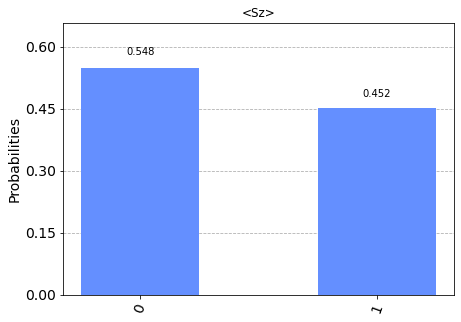

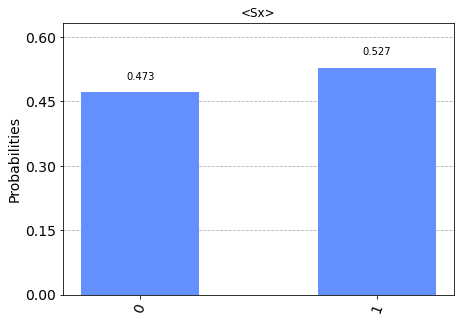

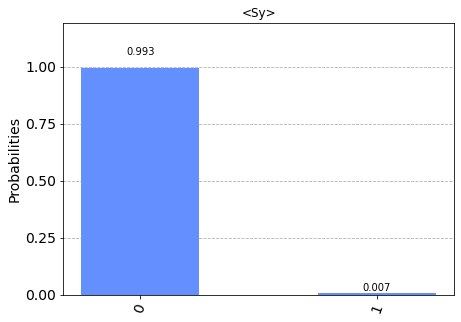

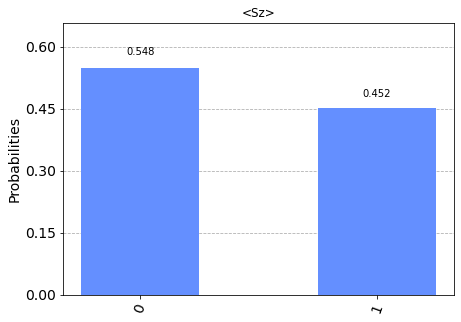

In [43]:
plot_histogram(counts_sx, title="<Sx>")
plot_histogram(counts_sy, title="<Sy>")
plot_histogram(counts_sz, title="<Sz>")

<b>Challenge Exercise: </b> The histogram is a convenient means of visualizing the probabilities. But we can also quantify a statistical uncertainty from these measurements. Such an uncertainty is based on the variance of the measurements. The effective uncertainty $\delta S^{z}$ is given by the standard error of the mean

<!---$$\sigma^{2}_{S^{z}} = \frac{\left(\pm\frac{\hbar}{2}\right)^{2} + \left(\pm\frac{\hbar}{2}\right)^{2} + \cdots + \left(\pm\frac{\hbar}{2}\right)^{2}}{N} = \frac{\hbar^{2}}{4}$$--->

$$\delta S^{z} = \frac{\sigma_{S^{z}}}{\sqrt{N}}$$,

where $\sigma_{S^{z}}$ is the standard deviations in the measurements of $\hat{S}^{z}$. Thus, you can report the result as the expectation value, plus-or-minus some effective uncertainty. Calculate the expectation values explicitly for $\left\langle \hat{S}^{x}\right\rangle$, $\left\langle \hat{S}^{x}\right\rangle$, $\left\langle \hat{S}^{x}\right\rangle$ for the state $\left|+\right\rangle_{y} = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle +i\left|-\right\rangle\right)$.

To accomplish this, you'll need to a little bit of Python dictionary gymnastics. Your counts are stored as a dictionary, meaning it's of the form:

```
{'0': 584, '1': 440}
```

You can retrieve actual counts by calling ```counts_sx['0']``` (which would return ```584```. The only hiccup is that in the case all the counts were (say) ```'1'```, ```counts_sx['0']``` would return an error. So you might need to check for the case where only one key exists and manually add the other entry with zero counts. Something like this would work:

```
if (len(counts_sx)==1):
    if (list(counts_sx.keys())[0]=='0'):
        counts_sx['1']=0
    else:
        counts_sx['0']=0
```

<b>Solution: </b> Here we use the simulations for simplicity, but this could easily be performed on the quantum hardware data. 

In [70]:
Nshot = 1024

job_sim = execute(circsx,backend=BasicAer.get_backend('qasm_simulator'),shots=Nshot)
counts_sx = job_sim.result().get_counts()

job_sim = execute(circsy,backend=BasicAer.get_backend('qasm_simulator'),shots=Nshot)
counts_sy = job_sim.result().get_counts()

job_sim = execute(circsz,backend=BasicAer.get_backend('qasm_simulator'),shots=Nshot)
counts_sz = job_sim.result().get_counts()

Now let's clean up the dictionaries:

In [74]:
def clean_dictionary(dict):

    if (len(dict)==1):
        if (list(dict.keys())[0]=='0'):
            dict['1']=0
        else:
            dict['0']=0

    return dict

counts_sx = clean_dictionary(counts_sx)
counts_sy = clean_dictionary(counts_sy)
counts_sz = clean_dictionary(counts_sz)

From here it's straightforward to compute the averages and variances once we remember that a key of ```'0'``` corresponds to $+\frac{1}{2}$ and ```'1'``` corresponds to $-\frac{1}{2}$ (setting $\hbar = 1$, as discussed earlier). To use built-in functions, it's easy if we just reconstruct the actual measured values:

In [89]:
measurements_sx = 0.5*np.concatenate([np.ones(counts_sx['0']),-np.ones(counts_sx['1'])])
measurements_sy = 0.5*np.concatenate([np.ones(counts_sy['0']),-np.ones(counts_sy['1'])])
measurements_sz = 0.5*np.concatenate([np.ones(counts_sz['0']),-np.ones(counts_sz['1'])])

Sxavg = np.mean(measurements_sx)
Syavg = np.mean(measurements_sy)
Szavg = np.mean(measurements_sz)
                
dSx = np.sqrt(np.var(measurements_sx)/Nshot)
dSy = np.sqrt(np.var(measurements_sy)/Nshot)
dSz = np.sqrt(np.var(measurements_sz)/Nshot)

And from here, we can display the results:

In [99]:
print('<Sx> = '+ str(Sxavg) + '+/-' + str(dSx))
print('<Sy> = '+ str(Syavg) + '+/-' + str(dSy))
print('<Sz> = '+ str(Szavg) + '+/-' + str(dSz))

<Sx> = -0.0009765625+/-0.01562497019764919
<Sy> = 0.5+/-0.0
<Sz> = 0.0107421875+/-0.015621393502772777


No surprises when we compare this to the histogram. But here you can see explicitly that $\left\langle \hat{S}^{x} \right\rangle \approx \left\langle \hat{S}^{z} \right\rangle \approx 0$ with comparable uncertainties. Since we began with an eigenstate of $\hat{S}^{y}$, this quantity is unambiguously defined, and we get no experimental uncertainty.

For real quantum hardware, one should expect a little more uncertainty. We can repeat the same steps. If you haven't overwritten your original counts from the last question, you can just use that data(*). Otherwise, it's simple to run it again:

In [103]:
qcomp = provider.get_backend('ibmq_casablanca')
job_sx = execute(circsx,backend=qcomp,shots=Nshot)
job_monitor(job_sx)
job_sy = execute(circsy,backend=qcomp,shots=Nshot)
job_monitor(job_sy)
job_sz = execute(circsz,backend=qcomp,shots=Nshot)
job_monitor(job_sz)

counts_sx = job_sx.result().get_counts()
counts_sy = job_sy.result().get_counts()
counts_sz = job_sz.result().get_counts()

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [104]:
counts_sx = clean_dictionary(counts_sx)
counts_sy = clean_dictionary(counts_sy)
counts_sz = clean_dictionary(counts_sz)

measurements_sx = 0.5*np.concatenate([np.ones(counts_sx['0']),-np.ones(counts_sx['1'])])
measurements_sy = 0.5*np.concatenate([np.ones(counts_sy['0']),-np.ones(counts_sy['1'])])
measurements_sz = 0.5*np.concatenate([np.ones(counts_sz['0']),-np.ones(counts_sz['1'])])

Sxavg = np.mean(measurements_sx)
Syavg = np.mean(measurements_sy)
Szavg = np.mean(measurements_sz)
                
dSx = np.sqrt(np.var(measurements_sx)/Nshot)
dSy = np.sqrt(np.var(measurements_sy)/Nshot)
dSz = np.sqrt(np.var(measurements_sz)/Nshot)

print('<Sx> = '+ str(Sxavg) + '+/-' + str(dSx))
print('<Sy> = '+ str(Syavg) + '+/-' + str(dSy))
print('<Sz> = '+ str(Szavg) + '+/-' + str(dSz))

<Sx> = 0.0107421875+/-0.015621393502772777
<Sy> = 0.482421875+/-0.0041066274704600475
<Sz> = 0.021484375+/-0.015610569011854952


Now granted, these are just <i>statistical estimates</i> of the uncertainty ($\sim 68\%$ confidence that the true result is within these ranges based solely on random fluctuations). But an important point is that this tells you nothing about <i>systematic</i> errors. Measurement errors, noise, coupling to the environment, and device imperfections can all lead to errors which aren't uncorrelated and not included in these uncertainty estimates. Quantum computing is primitive at the moment. It's not useless, and it's truly remarkable how well it works at this point. But it still has a long way to go.

(*) Fortunately, IBM actually stores all of your job information on the cloud. So even if you overwrite your data locally, you can technically access this information by combing through all of your stored results. For example

In [105]:
job_sx.job_id()

'61158e17a3a57028cbfb06cb'

In [107]:
job_sy.job_id()


'6115927aa3ad1f5b89012124'

In [108]:
job_sz.job_id()

'611592cfa3a57062a6fb06e7'

In [110]:
job_sx.backend()

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>

In [111]:
job_sy.backend()

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>

In [112]:
job_sz.backend()

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-education', group='high-point-uni-1', project='phy-3310')>

In [7]:
qcomp = provider.get_backend(backend_name="ibm_lagos")

In [9]:
ret_job = qcomp.retrieve_job('61432dcb9664973d89f66497')

In [131]:
qcomp

[]